In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gather

In [65]:
df = pd.read_csv(r'C:\Users\ilesannmi\Desktop\Projectssss___\Job Placement Dataset\Job_Placement_Data.csv')

In [97]:
df.head(3)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed


In [67]:
#plt.figure(figsize=(12,8))

#sns.heatmap(df.corr(), cmap='Blues', annot =True, annot_kws={'fontsize':16, 'fontweight':'bold'})

In [68]:
df.shape

(215, 13)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [70]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


# Assess

In [71]:
# A look at ther gender types
df.gender.unique()

array(['M', 'F'], dtype=object)

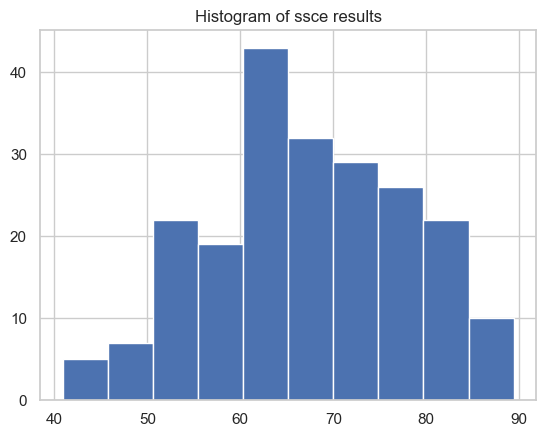

In [72]:
#ssc_percentage refers to their secondary school result percetage

df.ssc_percentage.hist()
plt.title("Histogram of ssce results")
plt.show()

In [73]:
#ssc_board 
df.ssc_board.unique()

df.ssc_board.value_counts()

Central    116
Others      99
Name: ssc_board, dtype: int64

### **Higher Education Result**

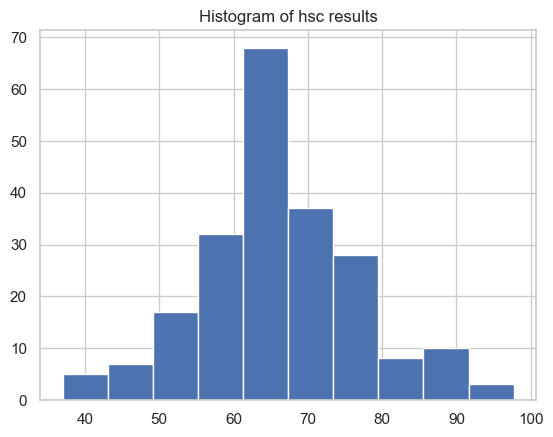

In [74]:
#ssc_percentage refers to their secondary school result percetage

df.hsc_percentage.hist()
plt.title("Histogram of hsc results")
plt.show()

In [75]:
df.hsc_board.value_counts()

Others     131
Central     84
Name: hsc_board, dtype: int64

In [76]:
131+84, 99 + 116

(215, 215)

#### Still a total of 215 boards

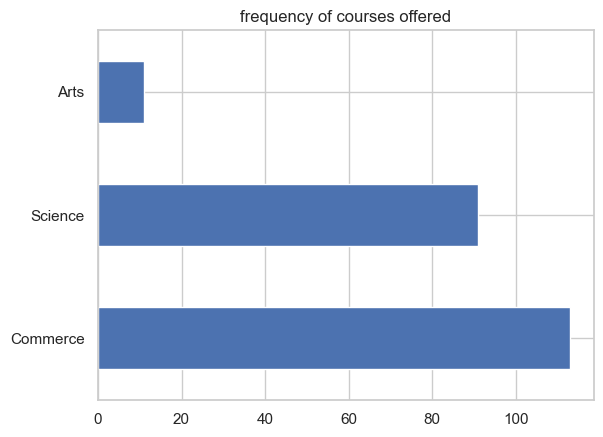

In [77]:
#frequency of higher degree courses offered

df.hsc_subject.value_counts().plot(kind= 'barh')
plt.title('frequency of courses offered')
plt.show()


In [78]:
#underdegree course

df.undergrad_degree.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64

##### More of commercial

In [79]:
#work experience 

df.work_experience.value_counts()

#many doesnt have work experience

No     141
Yes     74
Name: work_experience, dtype: int64

In [80]:
#Specialization

df.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [81]:
df.head(2)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


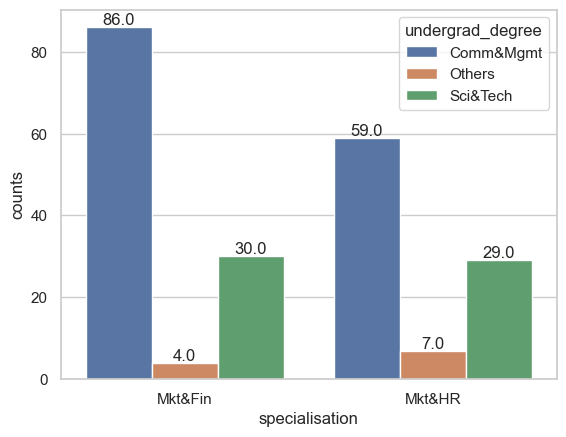

In [82]:

# Calculate the frequencies of each combination of categories
counts = df.groupby(['specialisation', 'undergrad_degree']).size().reset_index(name='counts')

# Create a clustered bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="specialisation", y="counts", hue="undergrad_degree", data=counts)

# Add values of each bar on top of them
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

#### how many undergraduate has work experience?



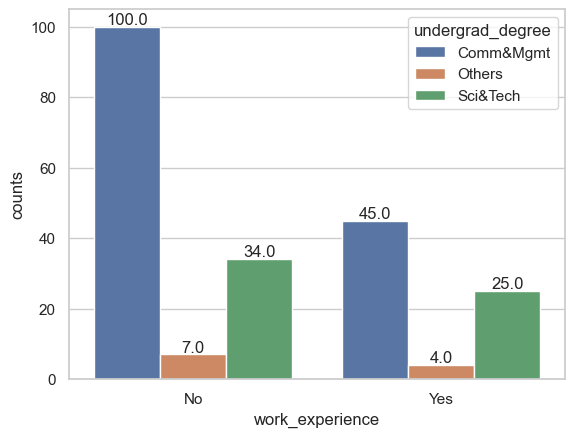

In [83]:
#countt = df.groupby(['undergrad_degree', 'work_experience']).size().plot(kind = 'barh')

countt = df.groupby(['work_experience', 'undergrad_degree']).size().reset_index(name='counts')

# Create a clustered bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="work_experience", y="counts", hue="undergrad_degree", data=countt)

# Add values of each bar on top of them
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

#### **Observation:** many undergraduate has no experience

## Job placement in relation to work experience

### Does work experience matter??

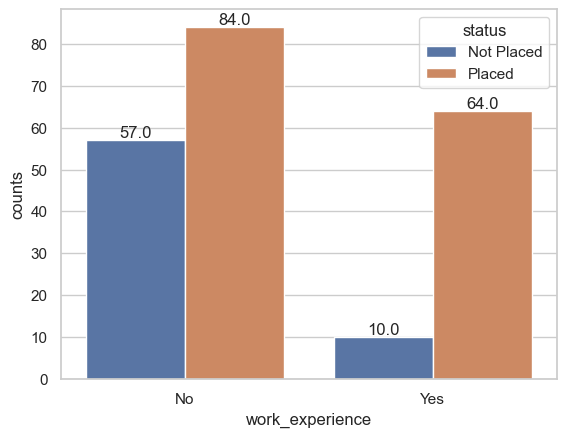

In [84]:
#countt = df.groupby(['undergrad_degree', 'work_experience']).size().plot(kind = 'barh')

countt = df.groupby(['work_experience', 'status']).size().reset_index(name='counts')

# Create a clustered bar chart using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x="work_experience", y="counts", hue="status", data=countt)

# Add values of each bar on top of them
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

#### **Obseervation:**  Work experience doesnt really matter